# Exploratory Data Analysis and Preprocessing

## Homework #1 by Glaktionova Natalia

Breast Cancer Wisconsin (Diagnostic) Data Set

## Знакомство с данными

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

Считываем и просматриваем данные

In [3]:
df = pd.read_csv('data/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN




Изучаем структуру данных. Есть один столбец id типа int64 (не нужен для анализа), один столбец diagnosis типа object (наша цель), все остальные столбцы типа float64. Данные есть по всем строкам и столбцам за исключением столбца "Unnamed: 32" (надо удалять из датасета)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Посмотрим на базовые статистики датасета

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

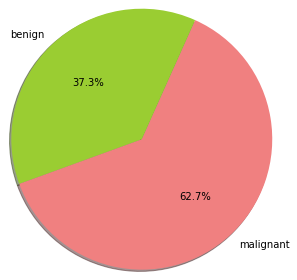

In [19]:
colors = ['lightcoral', 'yellowgreen']
labels = ['malignant', 'benign']
plt.pie(df.diagnosis.value_counts(), radius = 1.5, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle=200);

Избавляемся от id и пустого столбца

In [21]:
df = df.drop(columns=['id','Unnamed: 32'])

## Визуальный анализ

Строим гистограммы по всем столбцам

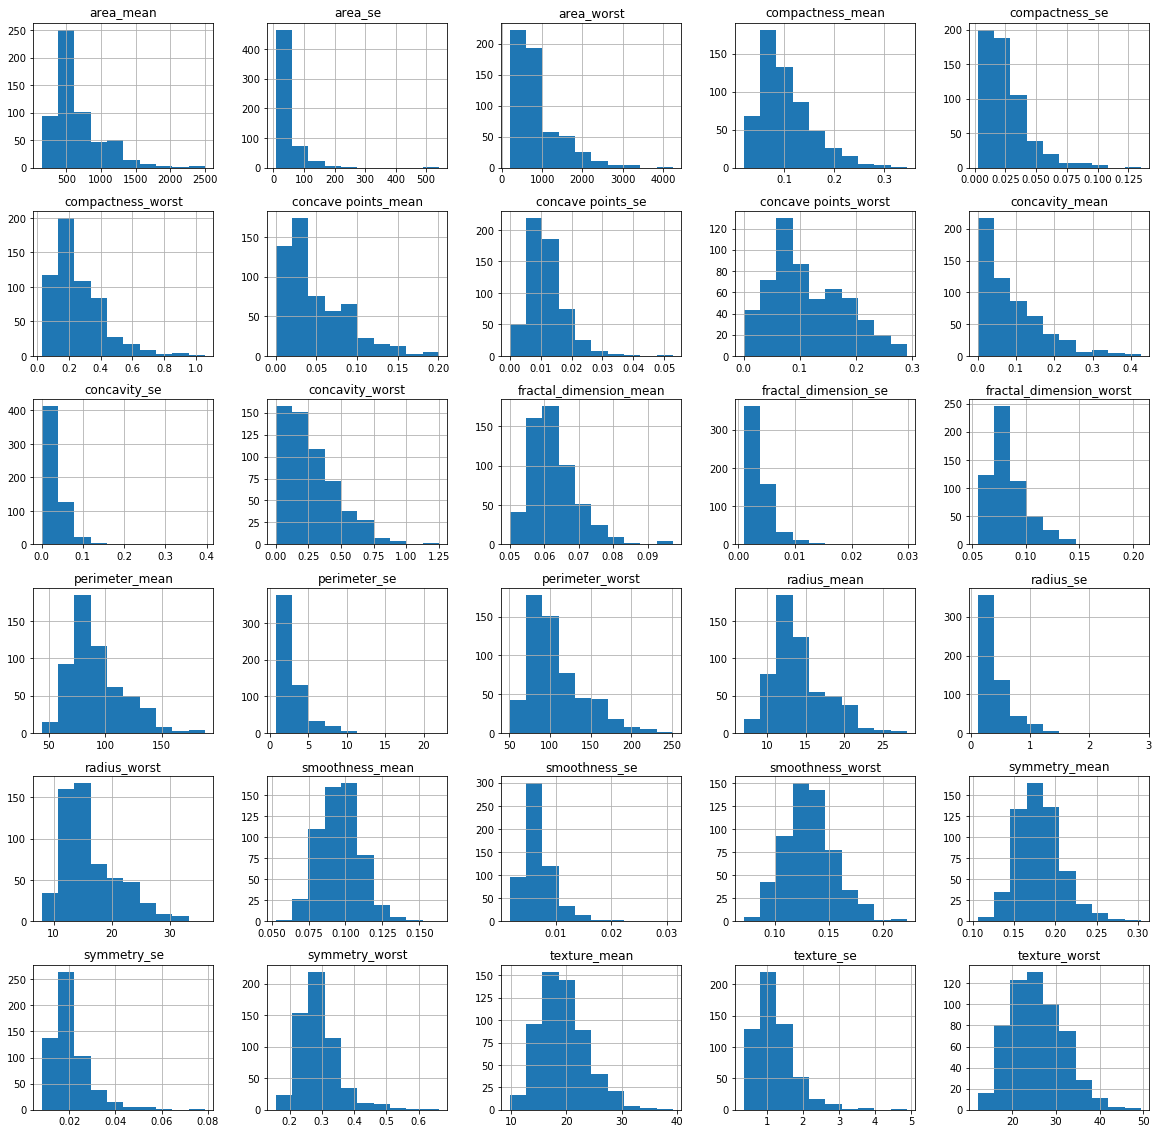

In [18]:
df.hist(figsize=(20, 20));

Строим гистограммы по всем признакам в разбивке по диагнозу.

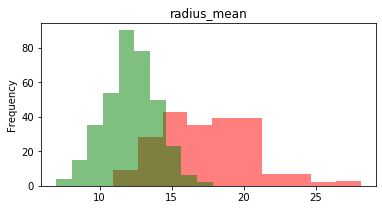

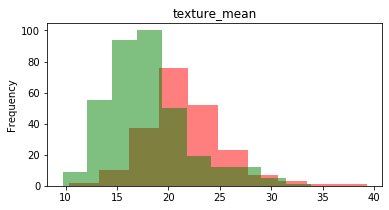

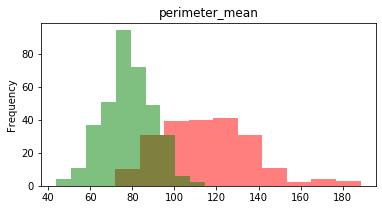

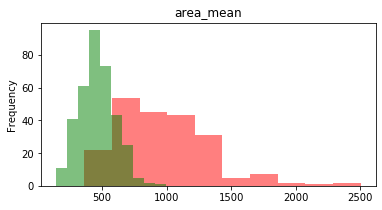

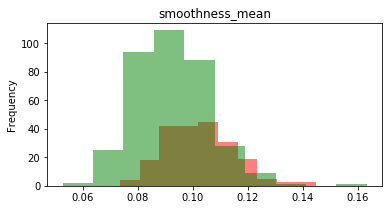

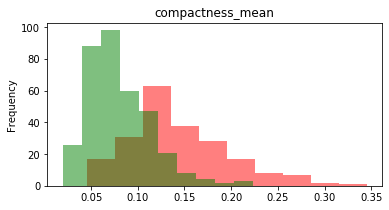

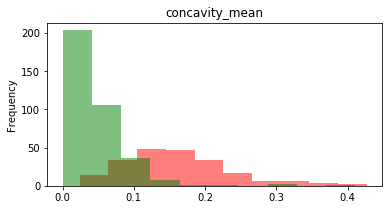

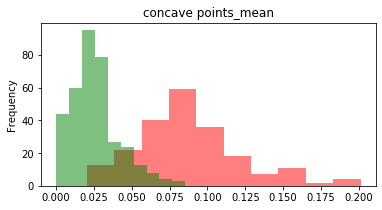

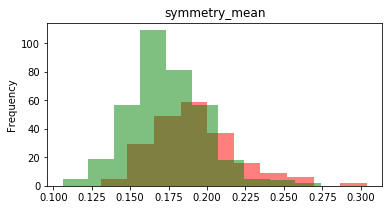

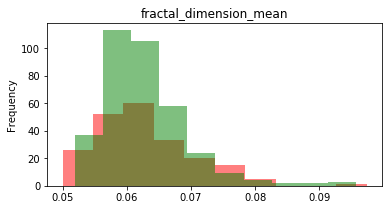

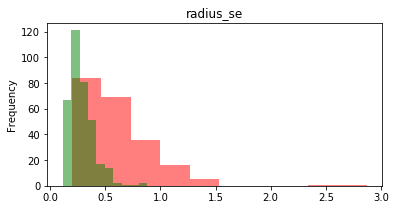

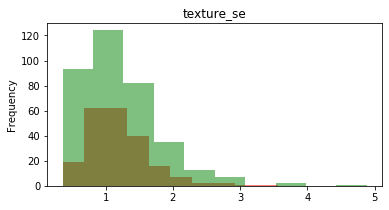

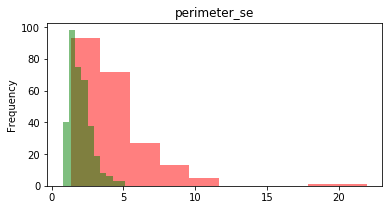

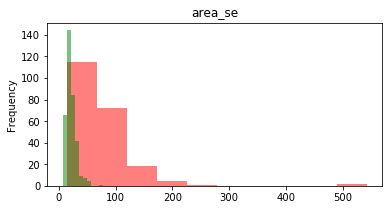

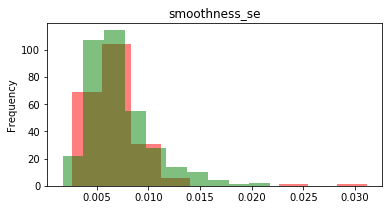

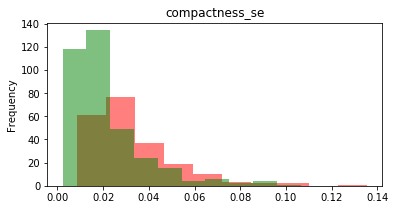

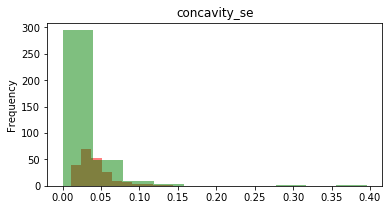

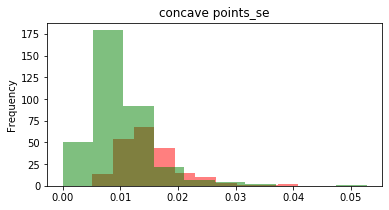

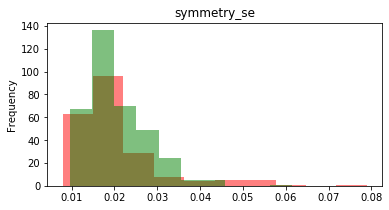

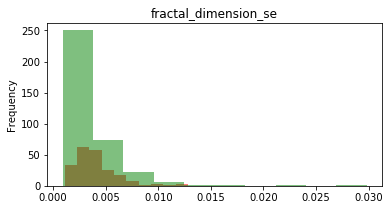

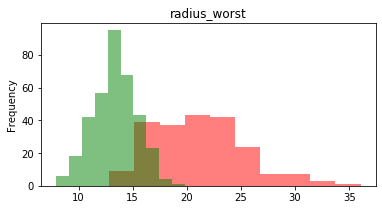

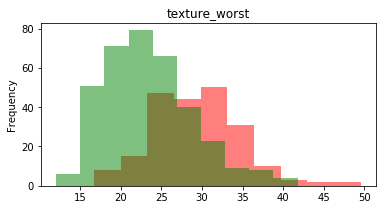

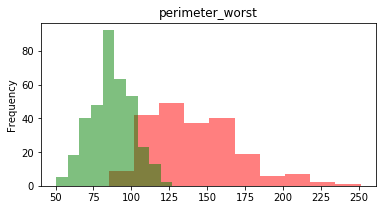

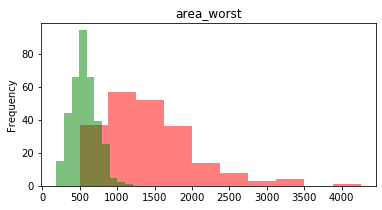

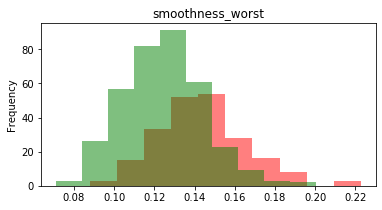

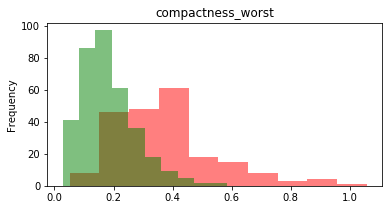

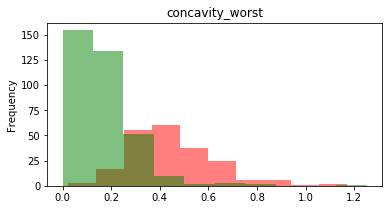

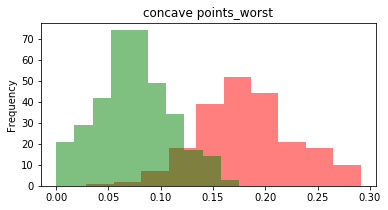

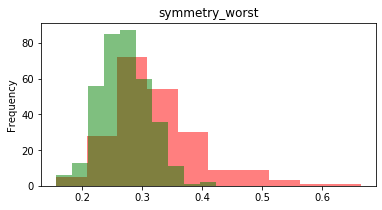

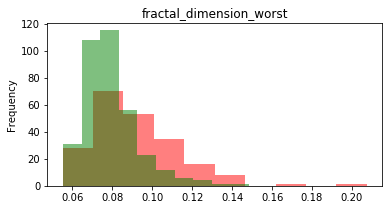

In [14]:
for column in df.columns[1:]:
    plt.figure(figsize = (6,3))
    #figure, axes = plt.subplots(figsize = (6,3), ncols = 2)
    df[column][df['diagnosis'] == 'M'].plot.hist(alpha = 0.5, color = 'red', title = column)
    df[column][df['diagnosis'] == 'B'].plot.hist(alpha = 0.5, color = 'green')
    plt.show()


Строим тепловую карту по всем признакам

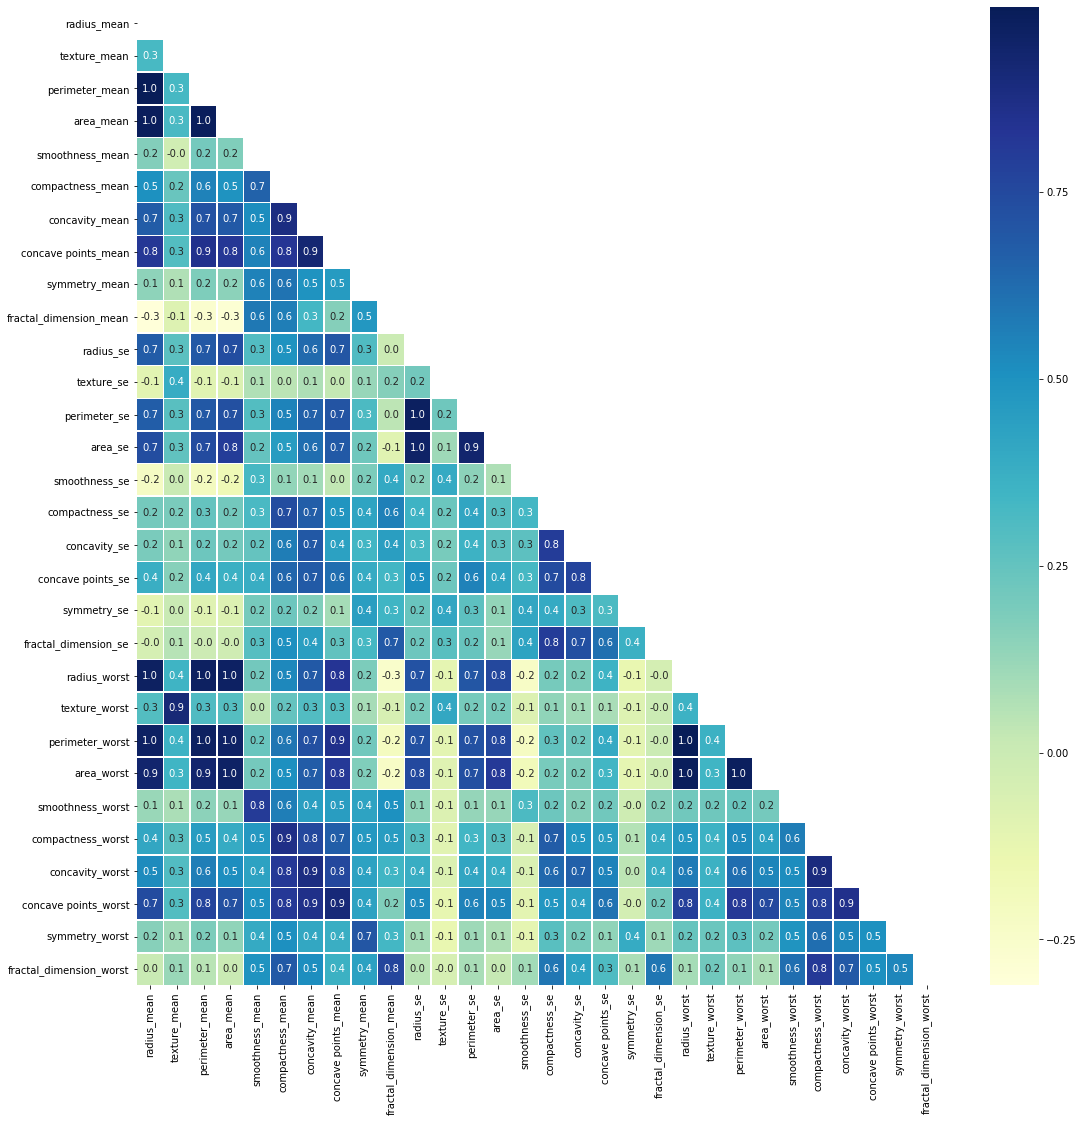

In [22]:
Corr = df.corr()
plt.figure(figsize=(18,18));
lower_corr = Corr.where(np.tril(np.ones(Corr.shape), k=-1).astype(np.bool))
sns.heatmap(lower_corr, annot=True, linewidths=.5, fmt='.1f', cmap="YlGnBu");

Наблюдается сильно скоррелированные признаки. Рассмотрим все признаки с корреляцией 0,9 и выше

In [28]:
columns = np.full((Corr.shape[0],), False, dtype=bool)
for i in range(Corr.shape[0]):
    for j in range(i+1, Corr.shape[0]):
        if Corr.iloc[i,j] >= 0.9:
            if not columns[j]:
                columns[j] = True

In [29]:
selected_columns = df.iloc[:,1:].columns[columns].to_list()
selected_columns

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

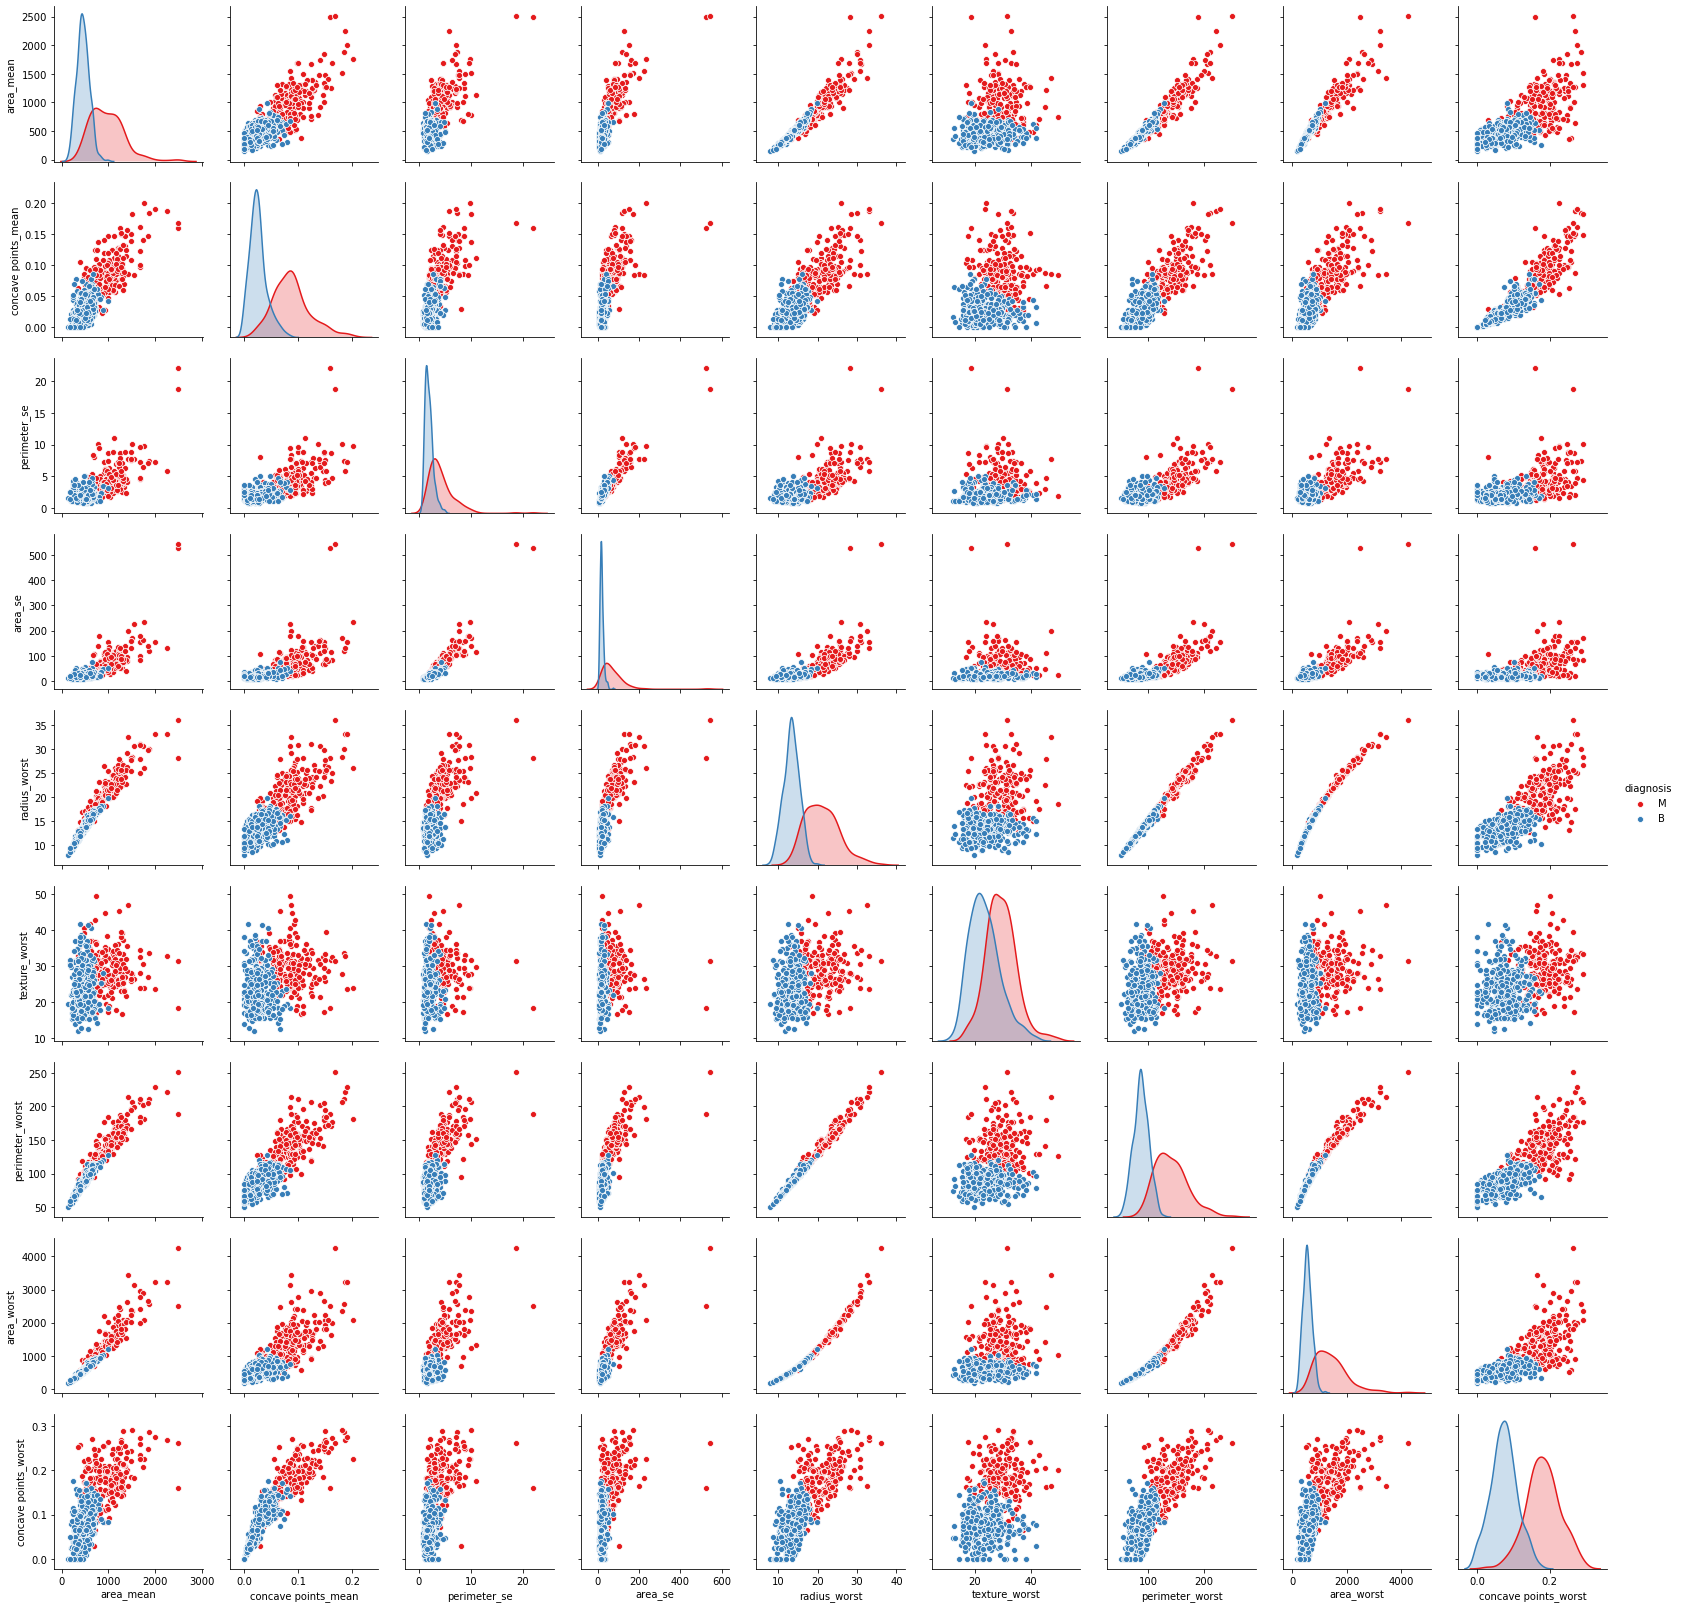

In [66]:
selected_columns[0] = 'diagnosis'
sns.pairplot(df[selected_columns], hue='diagnosis', palette='Set1');

Отобранные признаки действительно сильно коррелируют

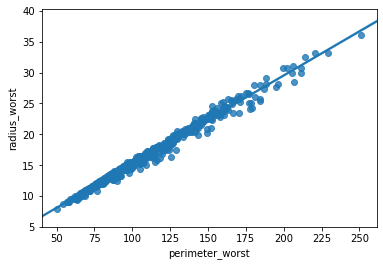

In [25]:
sns.regplot(x="perimeter_worst", y="radius_worst", data=df);

Убираем столбцы с сильной корреляцией

In [110]:
df_for_analysis = df.drop(columns=selected_columns)

Посмотрим на оставшиеся столбцы

In [101]:
df_for_analysis.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,0.132369,0.254265,0.272188,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,0.022832,0.157336,0.208624,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,0.071170,0.027290,0.000000,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,0.116600,0.147200,0.114500,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,0.131300,0.211900,0.226700,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,0.146000,0.339100,0.382900,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,0.222600,1.058000,1.252000,0.663800,0.207500


Наблюдается большой разрыв между максимумами разных признаков:

texture_mean 39.280000,

fractal_dimension_mean 0.097440

Для дальнейшей работы номализуем признаки

In [111]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_for_analysis.iloc[:,1:]) 
df_for_analysis.iloc[:,1:] = scaled_values
df_for_analysis = pd.melt(df_for_analysis, id_vars =['diagnosis'])

Строим boxplot

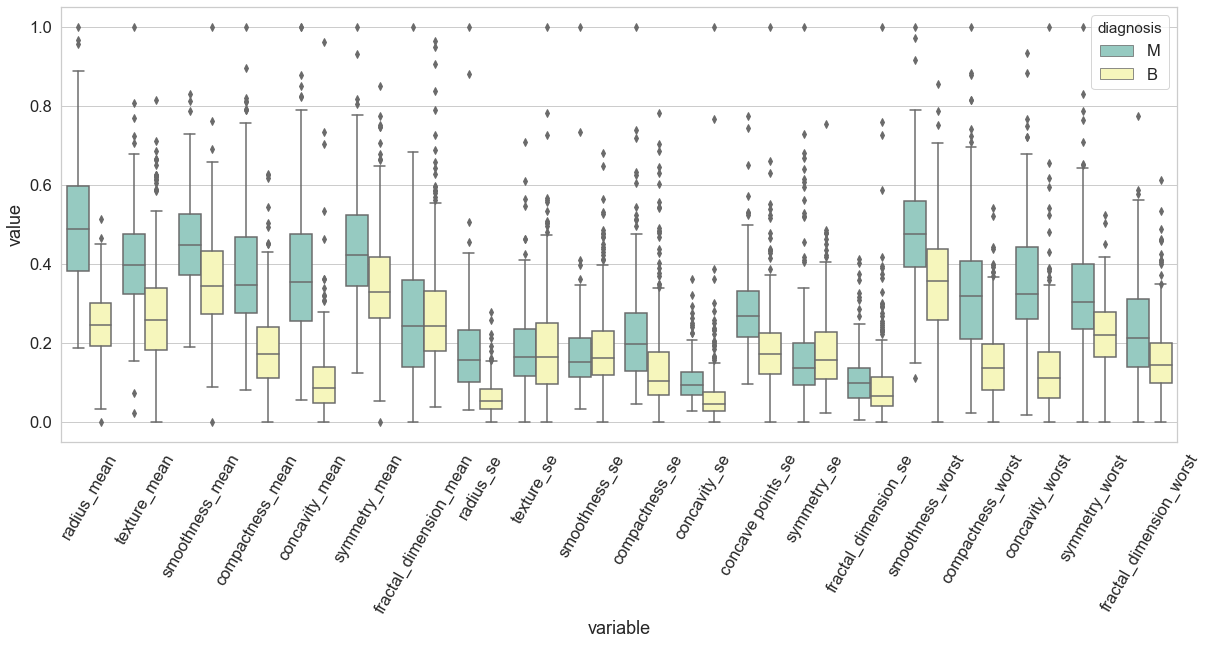

In [85]:
sns.set(rc={'figure.figsize':(20,8)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(data = df_for_analysis, hue = 'diagnosis', x = 'variable', y= 'value', palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60);

Обратим внимание на признаки, межквартильный размах по которым в разбивке на группы не пересекается, а значит это может облегчить нам классификацию

In [ ]:
columns_for_analysis = ['diagnosis','radius_mean','compactness_mean','concavity_mean',
                        'radius_se','compactness_worst','concavity_worst']

In [129]:
df_final = df_for_analysis.loc[df_for_analysis['variable'].isin(columns_for_analysis)]

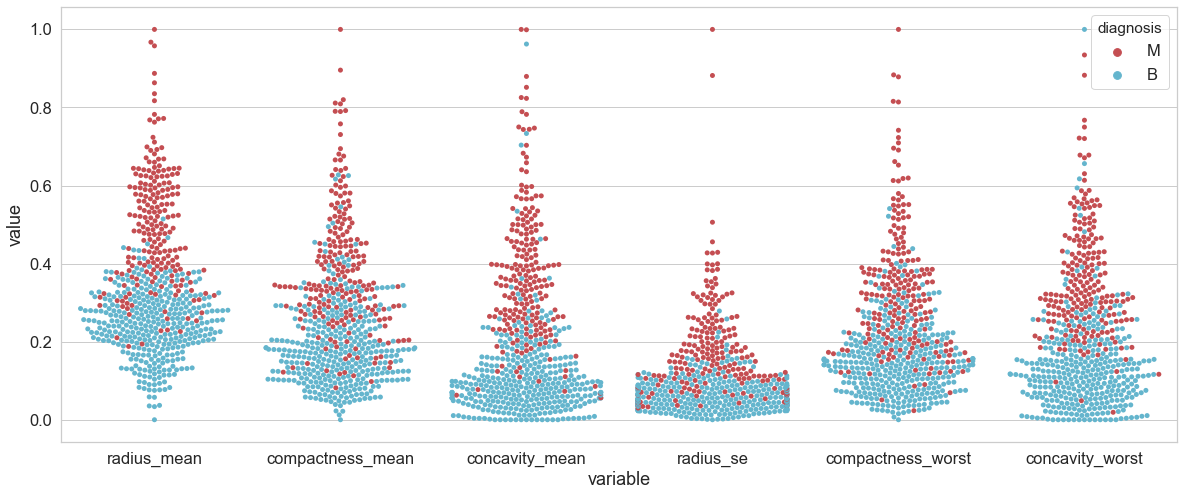

In [131]:
sns.swarmplot(x="variable", y="value", hue="diagnosis",
              palette=["r", "c"], data=df_final);